## Libraries

In [1]:
# Set the graphs as interactive.
%matplotlib inline

# Import necessary libraries for initial analysis
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as color

from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Pre-processing numerical features 

In [2]:
cookies = pd.read_csv("../data/cookies.csv")
cookies_validate =  pd.read_csv("../data/cookies_validate.csv")

In [3]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [4]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [5]:
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

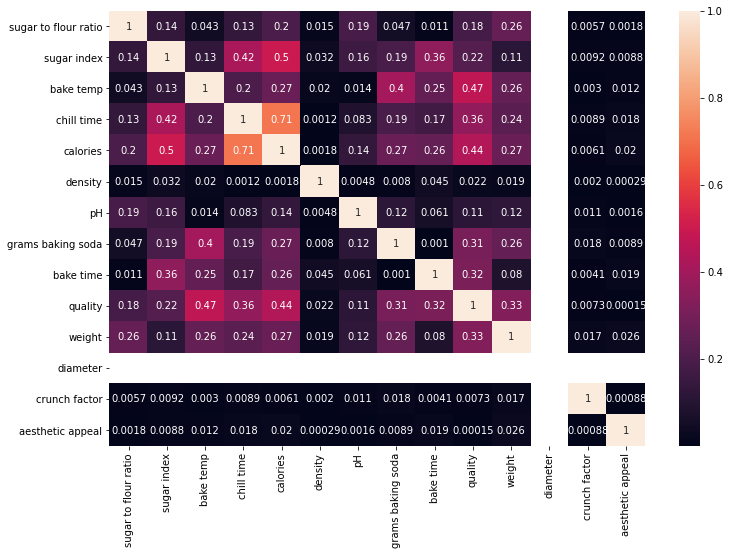

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

corrMatrix = cookies.corr().abs()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Eliminate the NaN and diameter cause doesn't make sense one column with every value with 7 (there's no corr)**

In [7]:
cookies = cookies.dropna()
cookies = cookies.drop(columns = 'diameter',axis=1)
cookies.isnull().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

**Let's see the values for string columns values and then drop de outliers with numerical values columns**

In [8]:
cookies['butter type'].unique() #For One Hot
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', 'peanut butter, raisins', 'oats'], dtype=object)

In [9]:
# we observe that mixins there's a not space applied in 'nuts,raisins', then we replace with space
cookies["mixins"] = cookies["mixins"].str.replace("nuts,raisins", "nuts, raisins")

**Detect outliers and remove them**

TypeError: unsupported operand type(s) for /: 'str' and 'int'

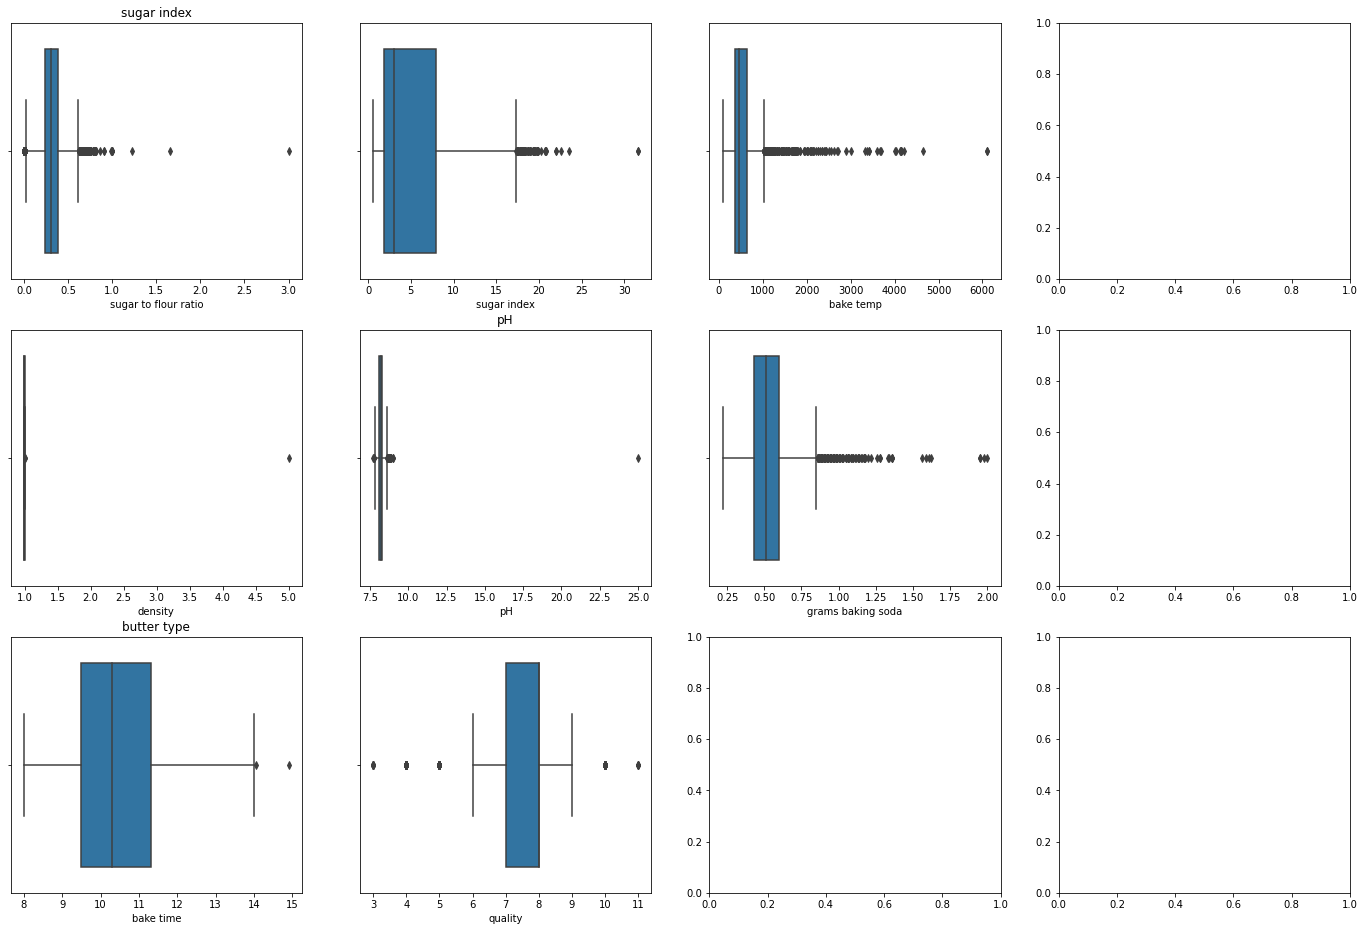

In [12]:
#Detect the outliers
fig, ax = plt.subplots(3, 4, figsize = (24,16))
for i in range(4):
    sns.boxplot(cookies[cookies.columns[i]], ax = ax[0, i])
    sns.boxplot(cookies[cookies.columns[i+5]], ax = ax[1, i])
    sns.boxplot(cookies[cookies.columns[i+9]], ax = ax[2, i])
    ax[0,0].set_title(cookies.columns[i])
    ax[1,1].set_title(cookies.columns[i+5])
    ax[2,0].set_title(cookies.columns[i+9])

In [13]:
cookies = cookies[cookies.select_dtypes(['int64','float64']).ge(0).all(1)]


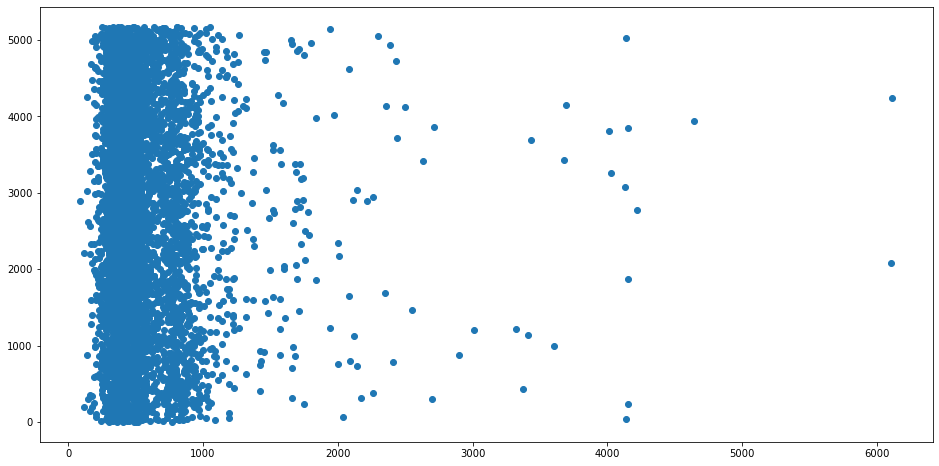

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(cookies['bake temp'], range(len(cookies['bake temp'])))
plt.show()

**Seeking the linear regresion. If the line is flat, we eliminate them cause doesn't mean any relation significant variable**

In [15]:
sns.pairplot(data = cookies_float, y_vars = cookies_float.columns,x_vars = 'quality' ,kind = 'reg' )

NameError: name 'cookies_float' is not defined

# Pre-processing categorical features

## Get dummies: Ord+cord

In [16]:
cookies = pd.concat([cookies,pd.get_dummies(cookies['butter type'], prefix='butter type')],axis=1)
cookies.drop(['butter type'],axis=1, inplace=True) #se elimina ya que se ha creado oneHot en dos nuevas columnas y es rebundante
cookies['mixins']=cookies['mixins'].astype('category')
cookies['mixins'] = cookies['mixins'].cat.codes


In [61]:
# define X and y (features and target)
X = cookies.drop(columns="quality")
y = cookies["quality"]

#define X_validate_cookis to scale laterly
X_validate = pd.read_csv('../data/cookies_validate_cleaned.csv')
X_validate.drop(columns='Unnamed: 0', inplace=True)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer

X_train_scaled = scaler.fit_transform(X_train) # scale data
X_test_scaled = scaler.transform(X_test) # scale test set

#Cookie Validate Scaled
X_validate_scaled = scaler.transform(X_validate)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import linear_model
from sklearn.model_selection import cross_validate
import time

In [65]:
logistic_regression = linear_model.LogisticRegression(max_iter=10)
reg = LinearRegression()
gradient = GradientBoostingRegressor(random_state=2)
random_forest = RandomForestRegressor()
tweedie = TweedieRegressor()
poly = PolynomialFeatures()
perceptron = Perceptron()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
lassolars = linear_model.LassoLars()
bayesan = linear_model.BayesianRidge()
knn = KNeighborsRegressor()


models = [reg, gradient, random_forest, logistic_regression, tweedie, perceptron, lasso, ridge, lassolars, bayesan,knn]
names_models = ['Linear regression', 'Gradient Boost', 'Random Forest', 'Logistic Regression', 'Tweedie', 'Perceptron', 'Lasso','Ridge', 'Lassolars', 'Bayesan','KNN']

In [66]:
all_models_results = pd.DataFrame(columns = ['test_r2', 'test_rmse', 'model', 'time_to_train_sec'])

# loop that cross_validates all above models for several metrics
for name, model in zip(names_models, models):
    start = time.time()
    if name in ['Stochastic Gradient Descent']:
         results = cross_validate(model, X_train_scaled, y_train, scoring = ('r2','neg_mean_squared_error')) # SGD computes an error when calculating its AUC
    else:
        results = cross_validate(model, X_train_scaled, y_train, scoring = ('r2','neg_mean_squared_error'))
    for key in ['fit_time','score_time']:
        del results[key]
    for key in results.keys():
        results[key] = results[key].mean()
    results_model = pd.DataFrame(results, index = range(1))
    results_model['model'] = name
    elapsed_time = time.time()-start
    results_model['time_to_train_sec'] = str(int(elapsed_time))
    all_models_results = pd.concat([all_models_results, results_model], ignore_index=True)
    
    print("Finished iterating {} in: {} seconds".format(name,str(int(elapsed_time))))

Finished iterating Linear regression in: 0 seconds
Finished iterating Gradient Boost in: 2 seconds
Finished iterating Random Forest in: 6 seconds
Finished iterating Logistic Regression in: 0 seconds
Finished iterating Tweedie in: 0 seconds


C:\Users\GiantsV3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\GiantsV3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GiantsV3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale

Finished iterating Perceptron in: 0 seconds
Finished iterating Lasso in: 0 seconds
Finished iterating Ridge in: 0 seconds
Finished iterating Lassolars in: 0 seconds
Finished iterating Bayesan in: 0 seconds
Finished iterating KNN in: 0 seconds


In [67]:
all_models_results = all_models_results.sort_values('test_r2', ascending=False)
all_models_results = all_models_results[['model', 'test_r2', 'time_to_train_sec']]
all_models_results = all_models_results.reset_index(drop=True)
all_models_results

,model,test_r2,time_to_train_sec
0,Random Forest,0.748599,6
1,Gradient Boost,0.715438,2
2,KNN,0.666949,0
3,Bayesan,0.630448,0
4,Logistic Regression,0.596357,0
5,Tweedie,0.592685,0
6,Perceptron,0.319930,0
7,Lasso,-0.001689,0
8,Lassolars,-0.001689,0
9,Ridge,-1.025335,0


## KNN Modelling

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint

In [75]:
start_time = time.time()
neigh1 = KNeighborsRegressor()

param_distribs={"n_neighbors": randint(low=3, high=50),
                "weights":["uniform", "distance"],
                "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size":randint(low=10, high=70),
                "p":[1,2]}

neigh1_search = GridSearchCV(estimator=neigh1,
                            param_grid={"n_neighbors":[13],
                            "weights":["distance"],
                            "algorithm":["brute"],
                            "leaf_size":[57],
                            "p":[1]},
                            scoring="neg_mean_squared_error",
                            cv=50)

neigh1_search.fit(X_train_scaled, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh1_search.best_score_, 2))
print(neigh1_search.best_params_)

--- 0.4258840084075928 seconds ---
-0.47
{'algorithm': 'brute', 'leaf_size': 57, 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


In [70]:
bestknn = KNeighborsRegressor(algorithm= 'brute', leaf_size= 57, n_neighbors= 13, p=1, weights= 'distance')

In [71]:
bestknn.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=57, n_neighbors=13, p=1,
                    weights='distance')

In [72]:
predictions_knn = bestknn.predict(X_test_scaled)

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_knn, squared=False)

0.6790098041624697

## Random Forest Modelling

In [89]:
start_time = time.time()
RF2 = RandomForestRegressor()
RF2_search = GridSearchCV(estimator=RF2,
                            param_grid={"max_features":["log2"],
                            "criterion":["mse"]},
                            scoring="neg_mean_squared_error",
                            cv=50)
RF2_search.fit(X_train_scaled, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
print(round(RF2_search.best_score_, 2))

--- 27.658279418945312 seconds ---
-0.4


In [90]:
RF2_search.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [91]:
best_random = RandomForestRegressor(criterion= 'mse', max_features='log2')

In [92]:
best_random.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features='log2')

In [93]:
predictions_rf = best_random.predict(X_test_scaled)
# pd.DataFrame(best_random.predict(X_validate_scaled)).to_csv('yellow_team_pred_random_forest.csv')

In [94]:
mean_squared_error(y_test, predictions_rf, squared=False)

0.6277272862427759

## GradientBoost

In [82]:
start_time = time.time()
grad = GradientBoostingRegressor()

grad_search = GridSearchCV(estimator=grad,
                                    param_grid={"max_features":["auto"],
                                                "criterion":["friedman_mse"],
                                                "loss":["ls"]},
                                    scoring="neg_mean_squared_error",
                                    cv=50)

grad_search.fit(X_train_scaled, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(grad_search.best_score_, 2))

--- 28.807628393173218 seconds ---
-0.47


In [83]:
grad_search.best_params_

{'criterion': 'friedman_mse', 'loss': 'ls', 'max_features': 'auto'}

In [84]:
best_grad = GradientBoostingRegressor(criterion = "friedman_mse", loss = "ls", max_features = "auto")

In [85]:
best_grad.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_features='auto')

In [86]:
predictions_grad = best_grad.predict(X_test_scaled)

In [87]:
mean_squared_error(y_test, predictions_grad, squared=False)

0.6940660772362536

## Removing Outliers

In [96]:
cookies_outliers = cookies.copy()

In [97]:
cookies_outliers["bake temp"] = cookies_outliers[cookies_outliers["bake temp"]<1000]

In [102]:
cookies_outliers.dropna(axis=0, how="any", inplace=True)

In [109]:
X_out = cookies_outliers.drop(columns="quality")
y_out = cookies_outliers["quality"]

In [112]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size = 0.2, random_state=8)

# training datasets to DataFrame again to manipulate them
X_train_out = pd.DataFrame(X_train_out, columns= X_out.columns)
X_test_out = pd.DataFrame(X_test_out, columns= X_out.columns)

In [113]:
scaler = StandardScaler() # initiate transformer

X_train_out_scaled = scaler.fit_transform(X_train_out) # scale data
X_test_out_scaled = scaler.transform(X_test_out) # scale test set

#Cookie Validate Scaled
X_validate_scaled = scaler.transform(X_validate)

### Training Models

### KNN

In [118]:
start_time = time.time()
neigh2 = KNeighborsRegressor()

param_distribs={"n_neighbors": randint(low=3, high=50),
                "weights":["uniform", "distance"],
                "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size":randint(low=10, high=70),
                "p":[1,2]}

neigh2_search = GridSearchCV(estimator=neigh2,
                            param_grid={"n_neighbors":[13],
                            "weights":["distance"],
                            "algorithm":["brute"],
                            "leaf_size":[57],
                            "p":[1]},
                            scoring="neg_mean_squared_error",
                            cv=50)

neigh2_search.fit(X_train_out_scaled, y_train_out)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh2_search.best_score_, 2))

--- 0.37998485565185547 seconds ---
-0.48


In [119]:
neigh2_search.best_params_

{'algorithm': 'brute',
 'leaf_size': 57,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

In [120]:
bestknn_out = KNeighborsRegressor(algorithm= 'brute', leaf_size= 57, n_neighbors= 13, p=1, weights= 'distance')

In [121]:
bestknn_out.fit(X_train_out_scaled, y_train_out)

KNeighborsRegressor(algorithm='brute', leaf_size=57, n_neighbors=13, p=1,
                    weights='distance')

In [122]:
predictions_knn_out = bestknn.predict(X_test_out_scaled)

In [124]:
mean_squared_error(y_test_out, predictions_knn_out, squared=False)

0.5988248725344165

### RandomForest

In [132]:
start_time = time.time()
RF3 = RandomForestRegressor()
RF3_search_out = GridSearchCV(estimator=RF2,
                            param_grid={"max_features":["log2"],
                            "criterion":["mse"]},
                            scoring="neg_mean_squared_error",
                            cv=50)
RF3_search_out.fit(X_train_out_scaled, y_train_out)
print("--- %s seconds ---" % (time.time() - start_time))
print(round(RF3_search_out.best_score_, 2))

--- 26.043431997299194 seconds ---
-0.4


In [133]:
RF3_search_out.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [134]:
best_random_out = RandomForestRegressor(criterion= 'mse', max_features='log2')

In [135]:
best_random_out.fit(X_train_out_scaled, y_train_out)

RandomForestRegressor(max_features='log2')

In [136]:
predictions_rf_out = best_random_out.predict(X_test_out_scaled)

In [137]:
mean_squared_error(y_test_out, predictions_rf_out, squared=False)

0.6206086913735247